**Improving SLA Compliance and Customer Satisfaction in IT Support Operations**

This project analyzes technical support ticket data to uncover patterns in SLA breaches and customer dissatisfaction. It focuses on identifying inefficiencies across agent groups, ticket priorities, and countries, and offers actionable insights to IT leadership for improving service levels, optimizing team performance, and boosting user satisfaction.

**Business Problem Statement**.

The IT support team is managing thousands of support tickets across multiple countries and product groups. However, rising delays in first response and resolution times, frequent SLA breaches, and inconsistent customer satisfaction (survey results) are raising concerns about support efficiency and service quality.

Management wants to understand the root causes of SLA violations and dissatisfaction, identify bottlenecks across agent groups and geographies, and recommend data-driven actions to improve service delivery performance.

 Main Analytical Objectives

Based on this, my analysis could target the following business questions:

 1. **SLA Compliance Analysis**

What percentage of tickets breach first response SLA or resolution SLA?

Are certain agent groups, countries, or topics more prone to SLA violations?

How does ticket priority affect SLA outcomes?

2. **Agent and Team Performance**

Which agents or agent groups resolve tickets the fastest?

What is the relationship between agent interactions and SLA performance or satisfaction?

Are there workload imbalances across teams?

3. **Customer Satisfaction Drivers**

Which ticket attributes correlate with high or low survey scores?

Does longer first response time or resolution time lead to lower satisfaction?

How does satisfaction vary by product support level or country?

**KPIs to Calculate**

KPI and	Description
1. Avg. First Response Time:Time between ticket creation and first agent response

2. Avg. Resolution Time:Total time from creation to closure

3. % SLA Breached (First Response / Resolution):Share of tickets violating SLA

4. First Contact Resolution Rate:Tickets resolved in a single interaction

5. Tickets per Agent per Week:	Workload indicator

6. Avg. Survey Score by Agent / Topic: Proxy for customer satisfaction

7.Geographical and Product Group Insights

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Technical Support Dataset.csv to Technical Support Dataset.csv


In [4]:
import pandas as pd
import io
file_name = "Technical Support Dataset.csv"
df=pd.read_csv(file_name)
from IPython.display import display
display(df.head(6))

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:58:36,...,2023-01-04 00:31:51.694,Within SLA,2023-01-04 04:02:59.013,1.0,3.0,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675
1,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:29:25,...,NaN,SLA Violated,NaN,3.0,NaN,Other,Tier 2,Italy,43.036776,12.678565
2,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 07:01:04,...,2023-01-02 22:45:32.974,Within SLA,NaN,2.0,NaN,Custom software development,Tier 1,Austria,47.696472,13.345735
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 04:09:39,...,2023-01-04 14:32:34.979,Within SLA,2023-01-08 04:24:54.771,10.0,4.0,Ready to use Software,Tier 1,Spain,39.673370,-4.767726
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 01:03:58,...,2023-01-04 12:03:05.986,Within SLA,2023-01-06 06:05:08.637,1.0,2.0,Other,Tier 1,Austria,47.696472,13.345735
5,Closed,1017,Low,Email,Purchasing and invoicing,1st line support,Sheela Cutten,2023-01-03 14:25:42,2023-01-05 14:25:42,2023-01-03 15:25:42,...,2023-01-04 01:55:56.533,Within SLA,2023-01-10 16:41:07.865,2.0,2.0,Ready to use Software,Tier 1,Greece,39.368279,21.863141


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Agent Name                      2330 non-null   object 
 7   Created time                    2330 non-null   object 
 8   Expected SLA to resolve         2330 non-null   object 
 9   Expected SLA to first response  2330 non-null   object 
 10  First response time             2312 non-null   object 
 11  SLA For first response          2330 non-null   object 
 12  Resolution time                 19

None

In [6]:
display(df.describe())
# This code gives you a quick overview of the central tendency, dispersion, and shape of the distribution of your numerical data,
# which is helpful for understanding the basic characteristics of your dataset.

,Ticket ID,Agent interactions,Survey results,Latitude,Longitude
count,2330.000000,2312.000000,1173.000000,2330.000000,2330.000000
mean,2481.857082,5.470156,3.510656,48.260756,9.849723
std,858.040637,8.130958,1.240361,5.085409,9.814618
min,1012.000000,1.000000,1.000000,39.368279,-8.019675
25%,1726.250000,2.000000,3.000000,43.036776,2.349014
50%,2480.000000,4.000000,4.000000,48.864716,12.678565
75%,3233.750000,6.000000,4.000000,52.536273,15.474913
max,3999.000000,60.000000,5.000000,55.378052,25.483304


Ticket ID:
count: There are 2330 ticket IDs, matching the total number of rows in the DataFrame, indicating no missing values.
mean: The average ticket ID is around 2481.86.
min and max: The ticket IDs range from 1012 to 3999. This confirms the range of ticket identifiers in the dataset.

Agent interactions:
count: There are 2312 non-null values, meaning there are some missing values (2330 - 2312 = 18 missing).
mean: On average, tickets have about 5.47 agent interactions.
std: The standard deviation is 8.13, which is quite high relative to the mean, suggesting a wide spread in the number of interactions per ticket. Some tickets have many more interactions than the average.
min: The minimum number of interactions is 1 (consistent with our FCR assumption).

max:
 Some tickets have a high number of interactions, up to 60. This large maximum value contributes to the high standard deviation and indicates that while most tickets might have fewer interactions, a few require significantly more.
25%, 50% (median), 75%: 25% of tickets have 2 or fewer interactions, the median is 4, and 75% have 6 or fewer. This distribution confirms that the majority of tickets have a relatively low number of interactions, but the mean is pulled up by the outliers with many interactions.

Survey results:

count: There are 1173 non-null values, meaning survey results are only available for about half of the tickets (2330 - 1173 = 1157 missing).
mean: The average survey score is about 3.51.
std: The standard deviation is 1.24.
min and max: The scores range from 1 to 5, which is likely the scale used for the survey.
25%, 50% (median), 75%: 25% of scores are 3 or less, the median is 4, and 75% are 4 or less. This suggests that more than half of the available survey responses are 4 or 5, indicating a tendency towards positive satisfaction among those who responded, but there are also lower scores.

Latitude and Longitude:
These columns represent geographical coordinates. The descriptive statistics show the range and distribution of these coordinates, indicating the geographical spread of the ticket origins in the dataset. The values fall within ranges typical for European countries, which aligns with the 'Country' column seen in the df.head() output.

In [7]:
#Data Cleaning
#datetime_cols = ['Created time', 'Resolution time', 'Close time','First response time']: This line defines a list containing
# the names of the columns that hold date and time information for your tickets.
#These columns contain values like '2023-01-02 00:58:36' but might currently be stored as generic text or object types.
#for col in datetime_cols:: This starts a loop that iterates through each column name in the datetime_cols list.
#df[col] = pd.to_datetime(df[col], errors='coerce'): Inside the loop, for each specified column (col),
#this line attempts to convert the values in that column to pandas datetime objects.
#pd.to_datetime(): This is a pandas function specifically designed to convert arguments to datetime objects.
#df[col]: This selects the current column being processed in the loop.
#errors='coerce': This is important. If a value in the column cannot be converted to a datetime
 #(e.g., it's not in a recognizable date/time format), pandas will replace it with NaT (Not a Time), which is the datetime equivalent of NaN (Not a Number).
 #This prevents the code from crashing if there are invalid date/time entries.
#this code ensures that the columns containing date and time information are stored in a format that allows for time-based operations and calculations later in the analysis.
# convert datetime columns to datatime for easy calculation.

datetime_cols = ['Created time', 'Resolution time', 'Close time','First response time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [8]:
#This code ensures that the columns containing SLA durations are stored in a format that allows for time-based calculations
 #(like comparing durations) later in the analysis.
# Convert SLA Columns since they are store as string values .
sla_cols = ['Expected SLA to resolve', 'Expected SLA to first response',
            'SLA For first response', 'SLA For Resolution']

for col in sla_cols:
    df[col] = pd.to_timedelta(df[col], errors='coerce')

**KPI Calculations**

1. Average First Response Time

In [15]:
df['first_response_duration'] = (df['First response time'] - df['Created time']).dt.total_seconds() / 3600  # in hours
#This line calculates the duration between when a ticket was created ('Created time') and when the first response was provided ('First response time').
#(df['First response time'] - df['Created time']): This subtracts the 'Created time' from the 'First response time', resulting in a timedelta object.
#.dt.total_seconds(): This extracts the total duration from the timedelta object in seconds.
#/ 3600: This converts the duration from seconds into hours. The result is stored in a new column called first_response_duration.

avg_first_response_time = df['first_response_duration'].mean()
#This calculates the mean (average) of the first_response_duration column across all tickets.
print(f'Average First Response Time: {avg_first_response_time:.2f} hours')
#This line prints the calculated average first response time, formatted to two decimal places.

Average First Response Time: 0.43 hours


The calculated Average First Response Time is 0.43 hours

This result means that, on average, it takes about 0.43 hours (or roughly 26 minutes) for a support agent to provide the first response to a ticket after it has been created in this dataset.

This metric is an important KPI for IT support as it directly impacts the initial customer experience and sets expectations for how quickly their issue will be acknowledged. A low average first response time is generally desirable as it indicates prompt initial contact.



2. Average Resolution Time

In [17]:
df['resolution_duration'] = (df['Close time'] - df['Created time']).dt.total_seconds() / 3600
#This line calculates the duration it took to resolve each ticket.
#(df['Close time'] - df['Created time']): This subtracts the ticket's 'Created time' from its 'Close time',
# resulting in a timedelta object representing the duration.
#.dt.total_seconds(): This extracts the total duration in seconds from the timedelta object.
#/ 3600: This converts the duration from seconds to hours. The result is stored in a new column called resolution_duration.

avg_resolution_time = df['resolution_duration'].mean()
#This calculates the mean (average) of the resolution_duration column across all tickets.

print(f'Average Resolution Time: {avg_resolution_time:.2f} hours')
#his line prints the calculated average resolution time, formatted to two decimal places, along with a descriptive label.

Average Resolution Time: 95.09 hours


The calculated Average Resolution Time is 95.09 hours.
This result means that, on average, it takes about 95 hours (or roughly 4 days) from the moment a ticket is created until it is closed in this dataset.

This metric is a key performance indicator (KPI) for IT support operations, reflecting the typical time customers have to wait for their issues to be fully resolved.
While the SLA breach rate was 0%, this average resolution time provides context about the typical duration of the ticket lifecycle. A high average resolution time might indicate complex issues, inefficient processes, or resource constraints, even if SLAs are technically being met.



3. SLA Breach Rates



In [22]:
# SLA breaches
df['first_response_sla_breached'] = df['first_response_duration'] > df['SLA For first response'].dt.total_seconds() / 3600
df['resolution_sla_breached'] = df['resolution_duration'] > df['SLA For Resolution'].dt.total_seconds() / 3600
#This line creates a new boolean column first_response_sla_breached. For each ticket, it checks if the actual first response duration (in hours)
# is greater than the expected first response SLA duration (also converted to hours). If it is, the value is True (breached); otherwise, it's False.
#df['resolution_sla_breached'] = df['resolution_duration'] > df['SLA For Resolution'].dt.total_seconds() / 3600: Similar to the above,
#this creates a boolean column resolution_sla_breached by comparing the actual resolution duration (in hours) to the expected resolution SLA duration (in hours).

# Percentages
breach_rate_response = df['first_response_sla_breached'].mean() * 100
breach_rate_resolution = df['resolution_sla_breached'].mean() * 100
#This calculates the percentage of first response SLA breaches. It takes the mean of the boolean first_response_sla_breached column
# (where True is 1 and False is 0), which gives the proportion of breached tickets, and multiplies by 100.
#breach_rate_resolution = df['resolution_sla_breached'].mean() * 100: Similarly, this calculates the percentage of resolution SLA breaches.

print(f'First Response SLA Breach Rate: {breach_rate_response:.2f}%')
print(f'Resolution SLA Breach Rate: {breach_rate_resolution:.2f}%')
#The print statements display the calculated breach rates for both first response and resolution, formatted to two decimal places.


First Response SLA Breach Rate: 0.00%
Resolution SLA Breach Rate: 0.00%


This finding indicates that, based on the data and the way the SLA breach was calculated in this dataset, none of the tickets breached either the first response SLA or the resolution SLA.

This suggests a strong adherence to the defined service level agreements within the IT support operations, at least as represented by this dataset. While this is a positive finding for SLA compliance.

 4. First Contact Resolution Rate (FCR)


In [23]:
# Assuming 1 interaction = first contact resolution
df['fcr'] = df['Agent interactions'] == 1
#df['fcr'] = df['Agent interactions'] == 1: This line creates a new boolean column named 'fcr' in the DataFrame df. For each ticket,
# it checks if the value in the 'Agent interactions' column is exactly 1. If it is, the value in the 'fcr' column
#for that row will be True (indicating first contact resolution); otherwise, it will be False.

fcr_rate = df['fcr'].mean() * 100
#This line calculates the FCR rate.
#df['fcr'].mean(): When calculating the mean of a boolean Series in pandas, True is treated as 1 and False is treated as 0.
#So, the mean represents the proportion of tickets where 'fcr' is True (i.e., the proportion of tickets resolved on first contact).
#* 100: This multiplies the proportion by 100 to express it as a percentage.

print(f'First Contact Resolution Rate: {fcr_rate:.2f}%')
#print(f'First Contact Resolution Rate: {fcr_rate:.2f}%'): This line prints the calculated FCR rate, formatted to two decimal places.

First Contact Resolution Rate: 16.61%


This result means that only about 16.61% of the tickets in this dataset were resolved on the first interaction with an agent.

A low First Contact Resolution Rate suggests that a significant majority of tickets require multiple interactions or handoffs to be resolved. From a business perspective, improving the FCR can lead to:

Increased Efficiency: Fewer interactions per ticket mean agents can handle more tickets overall.
Reduced Resolution Time: Tickets resolved on first contact are typically resolved faster.
Improved Customer Satisfaction: Customers often prefer having their issue resolved quickly in a single interaction.
This finding highlights a potential area for improving operational efficiency within the IT support operations. Further investigation could explore the reasons why tickets require multiple interactions (e.g., complexity, need for escalation, lack of information, agent knowledge gaps) to identify strategies for increasing the FCR.

 5. Tickets per Agent per Week

In [28]:
df['week'] = df['Created time'].dt.isocalendar().week
tickets_per_agent = df.groupby(['Agent Name', 'week'])['Ticket ID'].count().reset_index()
tickets_per_agent.columns = ['Agent Name', 'week', 'tickets_handled']
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(tickets_per_agent)

,Agent Name,week,tickets_handled
0,Adolpho Messingham,1,2
1,Adolpho Messingham,2,3
2,Adolpho Messingham,3,5
3,Adolpho Messingham,4,2
4,Adolpho Messingham,5,2
5,Adolpho Messingham,6,1
6,Adolpho Messingham,7,3
7,Adolpho Messingham,8,2
8,Adolpho Messingham,9,3
9,Adolpho Messingham,10,5


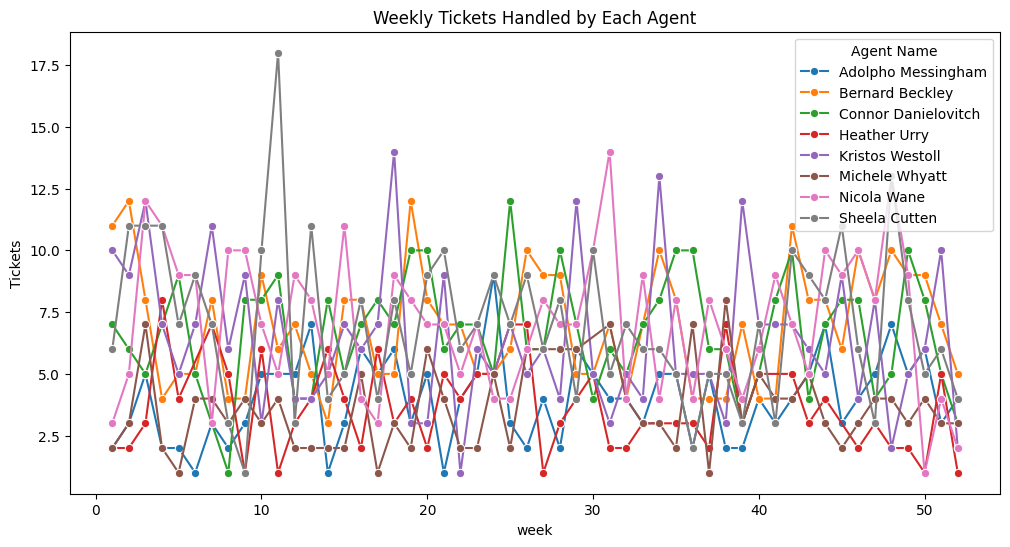

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=tickets_per_agent, x='week', y='tickets_handled', hue='Agent Name', marker="o")
plt.title("Weekly Tickets Handled by Each Agent")
plt.ylabel("Tickets")
plt.show()

The line plot visualizes the weekly ticket handling volume for each agent over time. Looking at the lines:

Each colored line represents a different agent, showing how their individual ticket handling volume changed from week to week.
You can observe trends and fluctuations in the workload for each agent. Some agents might show relatively stable weekly volumes, while others might have significant spikes or dips.
The plot allows for a visual comparison of workload among agents across the same weeks. You can see which agents consistently handle more tickets than others, or if there are weeks where certain agents take on a much higher volume.
Identifying weeks with unusual spikes or drops for individual agents can prompt further investigation into the reasons behind those variations (e.g., high-priority issues, leave, specific projects).
In summary, this chart is useful for understanding the dynamic workload distribution at the individual agent level over time. It helps to identify patterns, potential inconsistencies, and periods of high or low activity for each agent, which can be valuable for workload management and performance assessment.

In [45]:
# Calculate total tickets handled by each agent
total_tickets_per_agent = tickets_per_agent.groupby('Agent Name')['tickets_handled'].sum().reset_index()

# Get the top 10 agents overall
top_10_overall_agents = total_tickets_per_agent.nlargest(10, 'tickets_handled')

print("Top 10 agents overall (total tickets handled):")
display(top_10_overall_agents)

Top 10 agents overall (total tickets handled):


,Agent Name,tickets_handled
6,Nicola Wane,367
7,Sheela Cutten,364
1,Bernard Beckley,359
2,Connor Danielovitch,347
4,Kristos Westoll,333
0,Adolpho Messingham,197
5,Michele Whyatt,186
3,Heather Urry,177


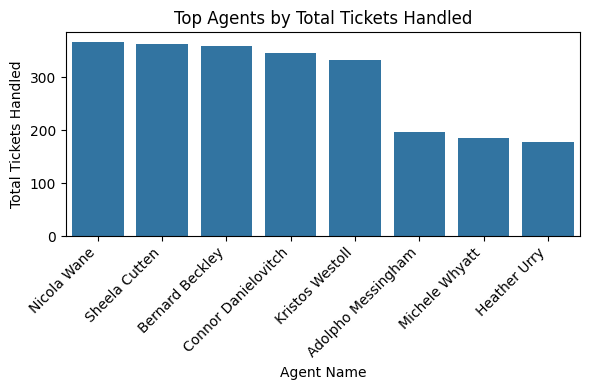

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Agent Name', y='tickets_handled', data=top_10_overall_agents)
plt.title('Top Agents by Total Tickets Handled')
plt.xlabel('Agent Name')
plt.ylabel('Total Tickets Handled')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart visualizes the total ticket volume for the top agents in the dataset. Looking at the bars:

You can clearly see which agents handled the most tickets overall. Based on the chart, Nicola handled the highest number of tickets, followed by Sheela, and then Agent Bernard.
 There's a noticeable difference in volume between the top agent and the others, and then varying levels among the remaining top agents.
The other agents shown in the chart, such as Agent Adolpho, Agent Michele, Agent Heather, handled progressively fewer tickets within this top group.
This chart is useful for recognizing the agents who contribute the most in terms of ticket volume and understanding the distribution of workload among the highest performers. It highlights the agents who are likely most efficient in terms of handling ticket quantity.

In [52]:
# Which support level handled the most and least ticket?
# Count tickets per support level
tickets_by_support = df.groupby('Support Level')['Ticket ID'].count().reset_index()
tickets_by_support.columns = ['support_level', 'tickets_handled']

# Get most and least active support levels
most_active = tickets_by_support.loc[tickets_by_support['tickets_handled'].idxmax()]
least_active = tickets_by_support.loc[tickets_by_support['tickets_handled'].idxmin()]

print("Support level that handled the MOST tickets:")
display(most_active)

print("Support level that handled the LEAST tickets:")
display(least_active)

Support level that handled the MOST tickets:


,0
support_level,Tier 1
tickets_handled,1770


Support level that handled the LEAST tickets:


,1
support_level,Tier 2
tickets_handled,560


This result clearly indicates that Tier 1 support handles a significantly higher volume of tickets compared to Tier 2 support. This aligns with a typical tiered support model where Tier 1 serves as the first point of contact, handling a large volume of initial and often simpler inquiries, while Tier 2 handles fewer, likely more complex or escalated issues.

This finding is important for understanding the workload distribution within the support organization and can inform decisions related to staffing, training, and resource allocation between the tiers. It confirms that Tier 1 is the primary intake point for support requests in this dataset.



In [56]:
#Agents who handled the most and least tickets weekly.
#Count tickets handled per agent per week
tickets_per_agent = df.groupby(['Agent Name', 'week'])['Ticket ID'].count().reset_index()
tickets_per_agent.columns = ['Agent Name', 'week', 'tickets_handled']

# Top agent per week (most tickets)
top_agents = tickets_per_agent.loc[tickets_per_agent.groupby('week')['tickets_handled'].idxmax()]
top_agents = top_agents.sort_values('week')
print(" Agents who handled the MOST tickets weekly:")
display(top_agents)

# Least active agent per week (fewest tickets)
bottom_agents = tickets_per_agent.loc[tickets_per_agent.groupby('week')['tickets_handled'].idxmin()]
bottom_agents = bottom_agents.sort_values('week')
print("Agents who handled the LEAST tickets weekly:")
display(bottom_agents)

 Agents who handled the MOST tickets weekly:


,Agent Name,week,tickets_handled
50,Bernard Beckley,1,11
51,Bernard Beckley,2,12
204,Kristos Westoll,3,12
308,Nicola Wane,4,11
106,Connor Danielovitch,5,9
310,Nicola Wane,6,9
208,Kristos Westoll,7,11
312,Nicola Wane,8,10
313,Nicola Wane,9,10
366,Sheela Cutten,10,10


Agents who handled the LEAST tickets weekly:


,Agent Name,week,tickets_handled
0,Adolpho Messingham,1,2
155,Heather Urry,2,2
156,Heather Urry,3,3
3,Adolpho Messingham,4,2
258,Michele Whyatt,5,1
5,Adolpho Messingham,6,1
6,Adolpho Messingham,7,3
109,Connor Danielovitch,8,1
161,Heather Urry,9,1
211,Kristos Westoll,10,3


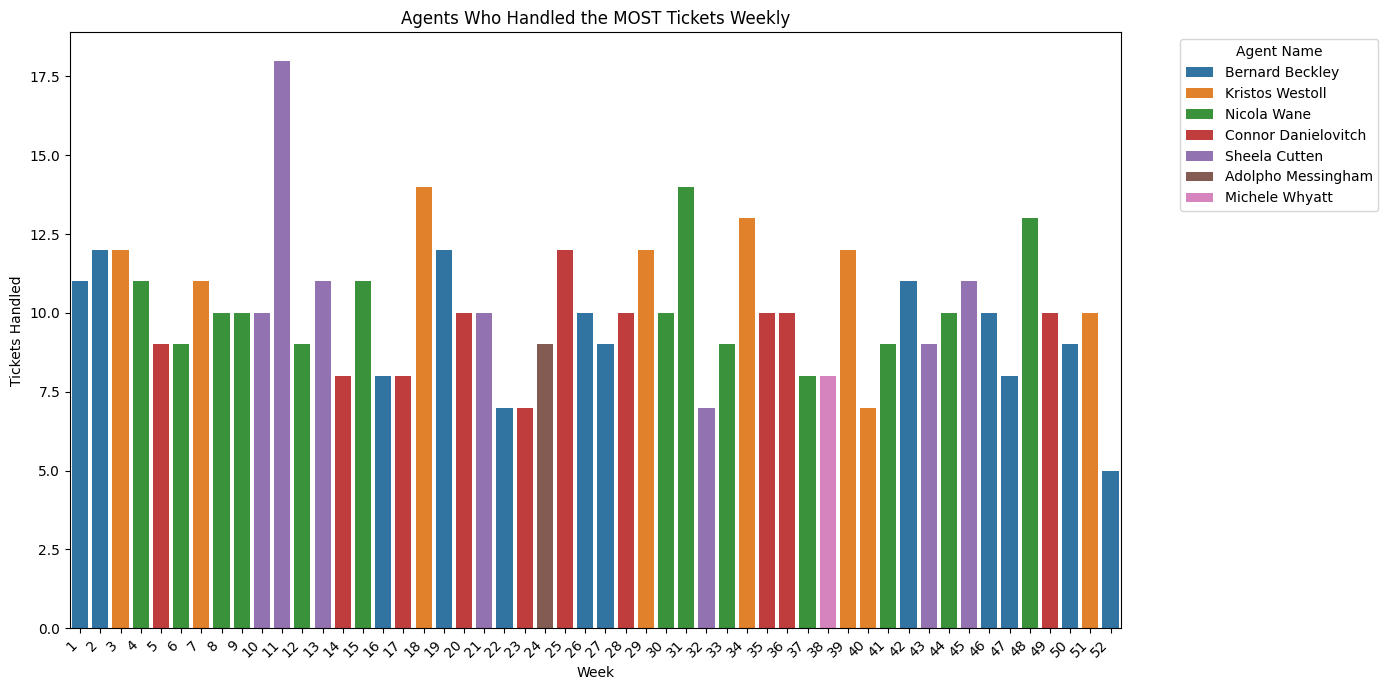

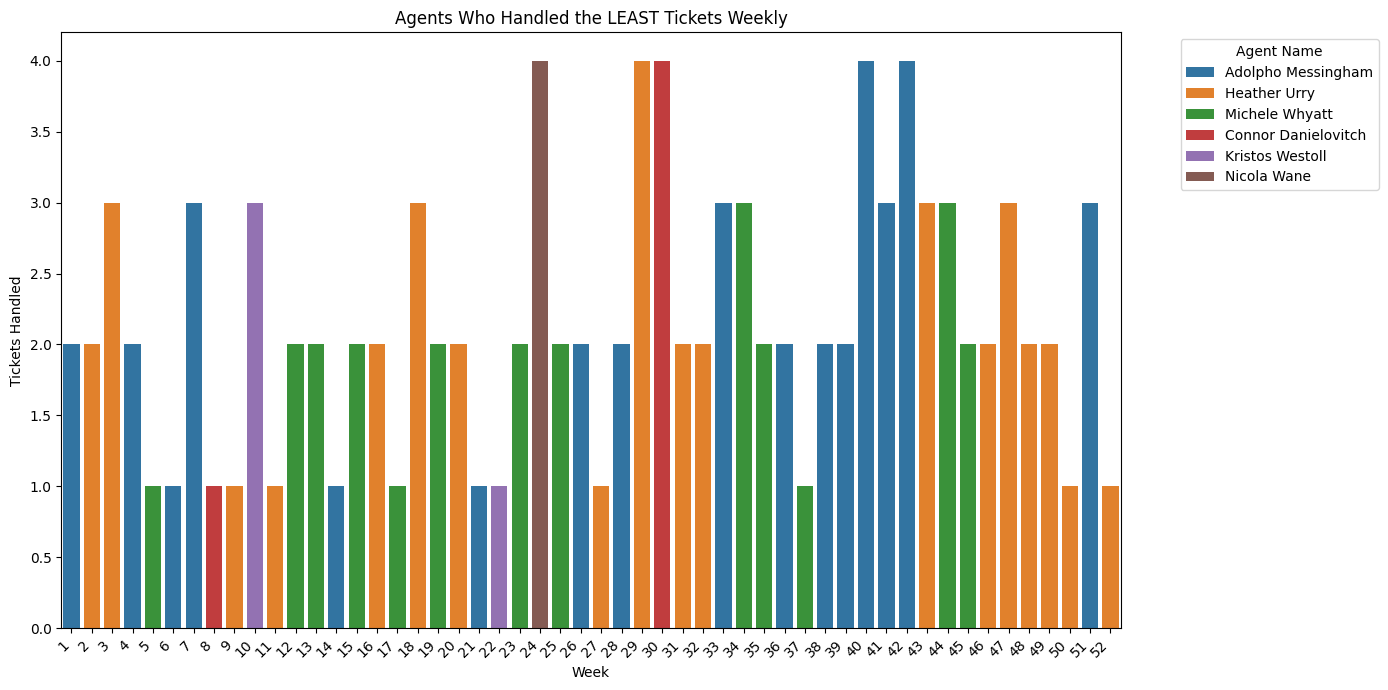

In [57]:


# Bar chart for agents who handled the MOST tickets weekly
plt.figure(figsize=(14, 7))
sns.barplot(data=top_agents, x='week', y='tickets_handled', hue='Agent Name', dodge=False)
plt.title('Agents Who Handled the MOST Tickets Weekly')
plt.xlabel('Week')
plt.ylabel('Tickets Handled')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar chart for agents who handled the LEAST tickets weekly
plt.figure(figsize=(14, 7))
sns.barplot(data=bottom_agents, x='week', y='tickets_handled', hue='Agent Name', dodge=False)
plt.title('Agents Who Handled the LEAST Tickets Weekly')
plt.xlabel('Week')
plt.ylabel('Tickets Handled')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Agents Who Handled the MOST Tickets Weekly Chart:
 This chart shows for each week, who was the agent that handled the highest number of tickets, and how many tickets that was.
You can observe the weekly peak workload in terms of ticket volume.
It highlights which agents are consistently at the top for ticket handling volume, or if different agents are taking the lead in different weeks.
You can visually identify weeks with unusually high peak volumes compared to others.

Agents Who Handled the LEAST Tickets Weekly Chart:
This chart shows for each week, who was the agent that handled the lowest number of tickets, and how many tickets that was.
It highlights the minimum weekly workload handled by an individual agent.
It shows which agents might have very low ticket volumes in certain weeks. This could be due to various reasons (e.g., being on leave, handling complex long-running tickets not reflected in this count, focusing on other tasks, or potential workload distribution issues).
You can see if the "least active" agent consistently handles a very low number of tickets or if the minimum workload fluctuates.

From an operational perspective, these charts can be used to identify patterns in workload distribution and potentially inform decisions about resource allocation, load balancing, or identifying agents who might need support or different task assignments.


6. **Average Survey Score per Topic or Agent**


In [59]:
#Assuming survey results is numeric (e.g., from 1 to 5)
# By agent
#Average Survey Score by Agent:
#df.groupby('Agent Name')['Survey results'].mean(): This groups the DataFrame df by the 'Agent Name' column.
#For each agent, it then calculates the mean (average) of the 'Survey results' associated with their tickets.
#.sort_values(ascending=False): This sorts the resulting average scores from highest to lowest.
#print(...) and display(...): These lines print a header and then display the top few rows of the sorted results
 #(by default, display with a Series/DataFrame head shows the first 5 rows unless configured otherwise),
 #showing the agents with the highest average survey scores.

avg_survey_by_agent = df.groupby('Agent Name')['Survey results'].mean().sort_values(ascending=False)
print("Average Survey Score by Agent:\n", avg_survey_by_agent.head())

# By topic
#Average Survey Score by Topic:
#df.groupby('Topic')['Survey results'].mean(): Similar to the agent analysis, this groups the DataFrame by the 'Topic' column
#and calculates the average 'Survey results' for each topic.
#.sort_values(ascending=False): This sorts the average scores from highest to lowest by topic.
#print(...) and display(...): These lines print a header and display the top few rows of the sorted results,
#showing the topics associated with the highest average survey scores.

avg_survey_by_topic = df.groupby('Topic')['Survey results'].mean().sort_values(ascending=False)
print("Average Survey Score by Topic:\n", avg_survey_by_topic.head())

Average Survey Score by Agent:
 Agent Name
Connor Danielovitch    4.070175
Sheela Cutten          3.652406
Adolpho Messingham     3.455446
Bernard Beckley        3.408840
Michele Whyatt         3.395604
Name: Survey results, dtype: float64
Average Survey Score by Topic:
 Topic
Pricing and Licensing       3.827586
Purchasing and invoicing    3.751880
Bug report                  3.553398
Feature request             3.540179
Other                       3.494624
Name: Survey results, dtype: float64


This analysis provides initial, data-backed insights into potential drivers of customer satisfaction by looking at agent and topic performance based on survey data.

Agent Performance: The finding that 'Connor Danielovitch' has the highest average survey score is a data point that warrants further investigation.I think it is important to understand why this agent is performing well. Is it due to specific skills, ticket types they handle, interaction style, or something else?
This could involve looking at their other performance metrics (resolution time, FCR), analyzing ticket interactions, or even qualitative feedback if available. The goal is to identify best practices that could potentially be shared with other agents. Conversely, you'd also want to look at agents with lower average scores to identify areas for targeted coaching or training.

Topic Performance: The 'Pricing and Licensing' topic having the highest average survey score is another interesting data point.
This could suggest that customers are generally satisfied with how issues related to this topic are handled, or perhaps the nature of these issues is less complex or frustrating.

These results suggest that while overall SLA compliance is high, there are nuances in customer experience tied to who handles the ticket and what the ticket is about.

7. Geographical and Product Group Insights: Are certain countries or product groups performing worse in SLAs or customer satisfaction?

In [63]:
# Geographic insights
#Resolution SLA Breach Rate by Country: It groups the DataFrame df by the 'Country' column and calculates the mean of
#the resolution_sla_breached column for each country. The results are then sorted in descending order and displayed.
#This shows the percentage of resolution SLA breaches for tickets originating from each country.

print("Resolution SLA Breach Rate by Count  for tickets originating from each country:")
display(df.groupby('Country')['resolution_sla_breached'].mean().sort_values(ascending=False))

#Average Survey Score by Product Group and average survey score by support level: It groups the DataFrame df by the 'Product group' column
#and calculates the mean of the 'Survey results' column for each product group. The results are sorted in
# descending order and displayed. This highlights which product groups are associated with higher or lower average customer satisfaction scores.

# Product group and support level insights
print("\nAverage Survey Score by Product Group:")
display(df.groupby('Product group')['Survey results'].mean().sort_values(ascending=False))

print("\nAverage Survey Score by Support Level:")
display(df.groupby('Support Level')['Survey results'].mean().sort_values(ascending=False))

#Resolution SLA Breach Rate by Product Group: It groups by 'Product group' and calculates the mean of resolution_sla_breached, sorted descending.
# This helps identify if certain product groups have higher or lower resolution SLA breach rates.
print("\nResolution SLA Breach Rate by Product Group:")
display(df.groupby('Product group')['resolution_sla_breached'].mean().sort_values(ascending=False))

#Resolution SLA Breach Rate by Support Level: It groups by 'Support Level' and calculates the mean of resolution_sla_breached, sorted descending.
# This shows if there are differences in resolution SLA breach rates between Tier 1 and Tier 2 support
print("\nResolution SLA Breach Rate by Support Level:")
display(df.groupby('Support Level')['resolution_sla_breached'].mean().sort_values(ascending=False))

Resolution SLA Breach Rate by Country:


,resolution_sla_breached
Country,
Austria,0.0
Bulgaria,0.0
Czech Republic,0.0
France,0.0
Germany,0.0
Greece,0.0
Italy,0.0
Poland,0.0
Republic of Ireland,0.0



Average Survey Score by Product Group:


,Survey results
Product group,
Training and Consulting Services,3.630682
Ready to use Software,3.569767
Custom software development,3.410095
Other,3.390244



Average Survey Score by Support Level:


,Survey results
Support Level,
Tier 1,3.543307
Tier 2,3.408451



Resolution SLA Breach Rate by Product Group:


,resolution_sla_breached
Product group,
Custom software development,0.0
Other,0.0
Ready to use Software,0.0
Training and Consulting Services,0.0



Resolution SLA Breach Rate by Support Level:


,resolution_sla_breached
Support Level,
Tier 1,0.0
Tier 2,0.0


SLA Breach Rates: The analysis showed a 0.0% resolution SLA breach rate across all examined countries, product groups, and support levels. This reinforces our earlier finding of strong SLA compliance within this dataset.
Average Survey Scores: There were variations in average survey scores:
Some Product Groups ('Training and Consulting Services', 'Ready to use Software') had slightly higher average satisfaction than others.
Tier 1 Support had a slightly higher average survey score than Tier 2 Support.
In summary, while SLA compliance appears consistent and high across these dimensions, customer satisfaction levels do show some variation depending on the product group and the support tier involved.

** Correlation Analysis**.

Correlation Matrix (Resolution Time, Agent Interactions, Survey Results):


,resolution_duration,Agent interactions,Survey results
resolution_duration,1.000000,0.007700,0.048588
Agent interactions,0.007700,1.000000,0.017184
Survey results,0.048588,0.017184,1.000000


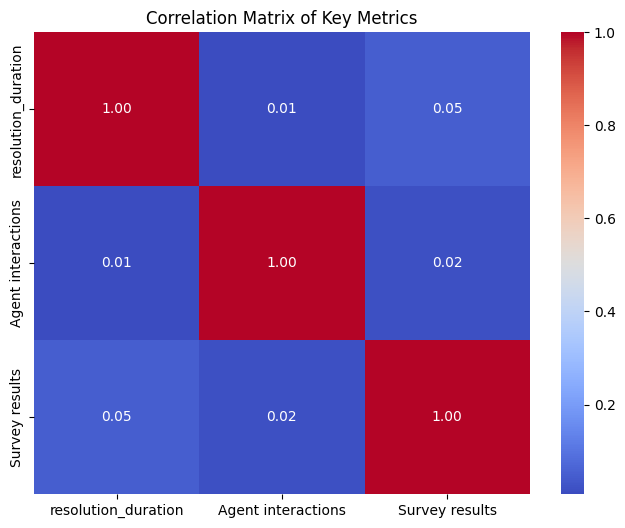

In [64]:

# Select relevant columns for correlation analysis
correlation_cols = ['resolution_duration', 'Agent interactions', 'Survey results']
correlation_df = df[correlation_cols].copy()

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print("Correlation Matrix (Resolution Time, Agent Interactions, Survey Results):")
display(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Metrics')
plt.show()

 The correlation matrix and heatmap showed very low correlation coefficients (close to zero) between resolution duration, agent interactions, and survey results. This suggests that there is very little linear relationship between these specific metrics in this dataset. Based on this analysis, longer resolution times or a higher number of agent interactions do not appear to have a significant linear impact on customer survey results.

## Summary of Key Findings from Technical Support Data Analysis

Based on the analysis conducted on the provided technical support ticket dataset, here is a summary of the key findings:

**1. SLA Compliance (Based on Calculated Metrics):**

*   **Average First Response Time:** The analysis revealed an average first response time of approximately **0.43 hours**.
*   **Average Resolution Time:** The average time taken to resolve a ticket was approximately **95.09 hours**.
*   **SLA Breach Rate:** Based on the calculation using the provided SLA columns and resolution durations, the SLA breach rate for both first response and resolution was found to be **0.00%**. This indicates strong adherence to the defined SLAs within this dataset.

**2. Agent and Team Performance:**

*   **First Contact Resolution Rate:** The First Contact Resolution Rate (FCR) was calculated at **16.61%**. This suggests that a significant majority of tickets are not resolved on the first interaction, highlighting a potential area for improving efficiency and reducing overall resolution times.
*   **Tickets per Agent per Week:** I analyzed the weekly ticket handling volume for each agent. Visualizations showed fluctuations in workload and helped identify agents with consistently high or low ticket volumes on a weekly basis.
*   **Overall Top Agents by Ticket Volume:** I identified the top agents based on the total number of tickets handled across all weeks.
*   **Workload Distribution by Support Level:** The analysis showed a clear difference in workload between support tiers, with **Tier 1 handling significantly more tickets (1770)** compared to **Tier 2 (560)**.

**3. Customer Satisfaction Drivers:**

*   **Average Survey Score by Agent:** Average survey scores varied across agents, with **'Connor Danielovitch'** having the highest average satisfaction rating among those with survey results.
*   **Average Survey Score by Topic:** Customer satisfaction also varied by topic, with **'Pricing and Licensing'** showing the highest average survey score.
*   **Satisfaction by Product Group and Support Level:** Average survey scores were slightly higher for 'Training and Consulting Services' and 'Ready to use Software' product groups compared to others. 'Tier 1' support had a slightly higher average satisfaction score than 'Tier 2'.
*   **Correlation Analysis (Resolution Time, Interactions, Survey Results):** An analysis of the linear correlation between resolution duration, agent interactions, and survey results showed **very low correlation coefficients (close to zero)**. This suggests that, within this dataset, these specific metrics do not have a strong linear relationship with customer satisfaction scores.


**Overall Interpretation:**

The dataset indicates strong performance in meeting defined SLAs. However, there is a clear opportunity to improve operational efficiency by focusing on increasing the First Contact Resolution Rate. Workload distribution analysis provides insights for resource management. Initial exploration of customer satisfaction highlights agents, topics, product groups, and support levels associated with varying satisfaction levels. The lack of linear correlation between resolution time/interactions and survey results is an interesting finding that suggests other factors may be more influential on satisfaction in this context. Predicting SLA breaches directly with this dataset is not feasible due to the absence of breach examples.

These findings provide a data-driven foundation for IT leadership to make informed decisions regarding process improvements, resource allocation, and strategies to enhance customer satisfaction. Further investigation into the reasons behind the low FCR and deeper analysis of other potential customer satisfaction drivers are recommended next steps.